# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\denis\AppData\Local\Temp\ipykernel_20476\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


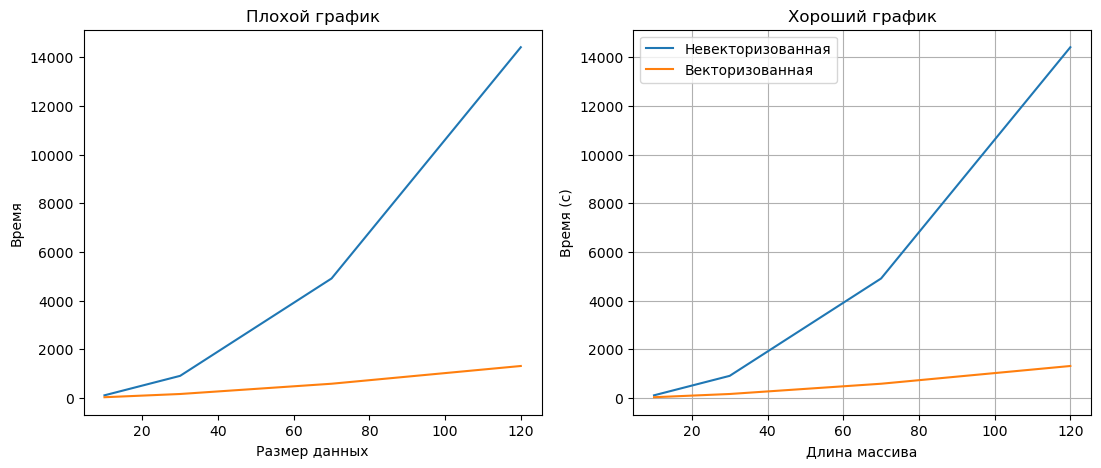

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

1


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\2261059052.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


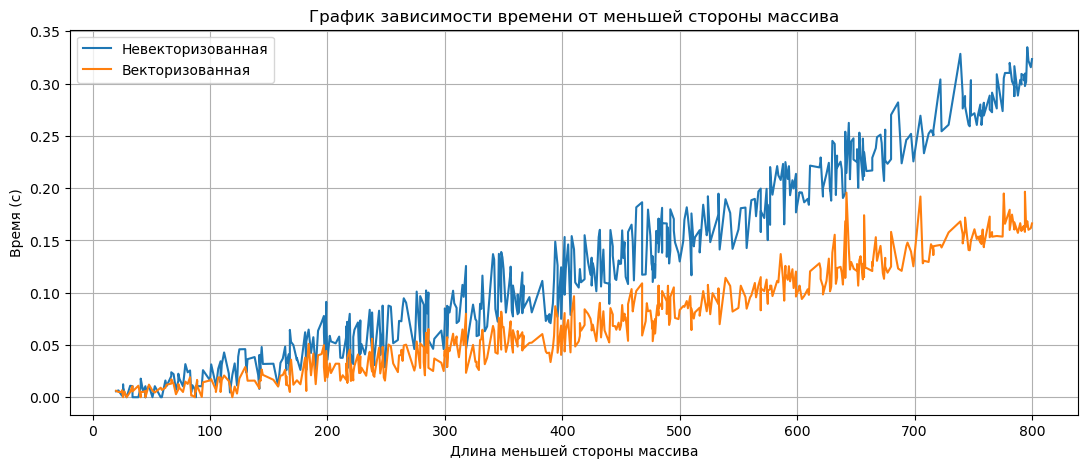

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time as time

%matplotlib inline

def prod_non_zero_diag(x):
    i=len(x)-1
    j=len(x[0])-1     
    s=0
    js=0
    prod=1
    while s<=i and js<=j:
        if (x[s][js]!=0):
            prod*=x[s][js]
        s+=1
        js+=1
    return prod
    pass

def prod_non_zero_diag_np(x):
    return np.prod(np.diag(x,0)[np.diag(x)!=0])
    pass


def show_graph(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(u"График зависимости времени от меньшей стороны массива")
    ax2.set_xlabel(u"Длина меньшей стороны массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    
    f.show()
    pass


time_vectorized=np.zeros(500)
time_non_vectorized=np.zeros(500)
data_size=np.zeros(500)
res=np.zeros(500)
for k in range(500):
    data_size[k]=random.randint(20,800);
data_size.sort()
#print(data_size)
print(1)
for k in range(500):
    n=int(data_size[k])
    m=random.randint(n,800+1)
    res[k]=n
    
    start_time=time.time()
    a = [[random.randint(-50, 50) for _ in range(m)] for _ in range(n)]
    res1=prod_non_zero_diag(a)
    time_non_vectorized[k]=(time.time()-start_time)

    start_time=time.time()
    ar = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            ar[i][j]=a[i][j]
    res2=prod_non_zero_diag_np(ar)
    time_vectorized[k]=(time.time()-start_time)
    #print(res1, " ", res2)
#print(time_non_vectorized, time_vectorized, res)
show_graph(time_non_vectorized, time_vectorized, res)


 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


1


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\2025556884.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


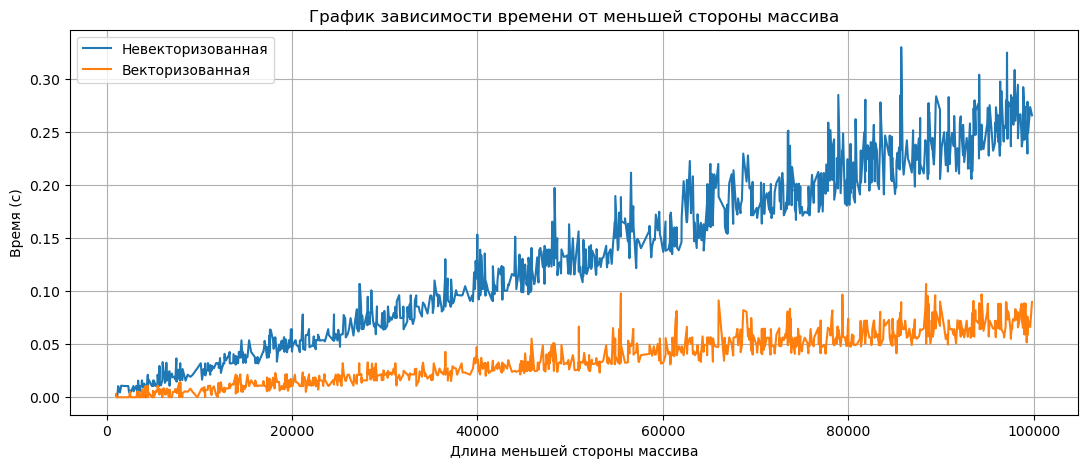

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time as time

def show_graph(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(u"График зависимости времени от меньшей стороны массива")
    ax2.set_xlabel(u"Длина меньшей стороны массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    
    f.show()
    pass

def are_multisets_equal(x, y):   
    x.sort()
    y.sort()
    return x==y
    pass

def are_multisets_equal_np(x, y):
    return np.sort(x)==np.sort(y)
    pass


time_vectorized=np.zeros(1000)
time_non_vectorized=np.zeros(1000)
data_size=np.zeros(1000)
res=np.zeros(1000)


for k in range(1000):
    data_size[k]=random.randint(1000,100000);
data_size.sort()

print(1)
for k in range(1000):
    n=int(data_size[k])
    
    start_time=time.time()
    
    x = [random.randint(-50, 50) for _ in range(n)]
    y = [random.randint(-50, 50) for _ in range(n)]
    res1=are_multisets_equal(x,y)
    
    time_non_vectorized[k]=(time.time()-start_time)

    start_time=time.time()
    
    x1 = np.zeros(n)
    y1 = np.zeros(n) 
    for i in range(n):
        x1[i]=x[i]
        y1[i]=y[i]
    
    res2=are_multisets_equal_np(x1,y1)
    
    time_vectorized[k]=(time.time()-start_time)
    
show_graph(time_non_vectorized, time_vectorized, data_size)



* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

1


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\2041756469.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


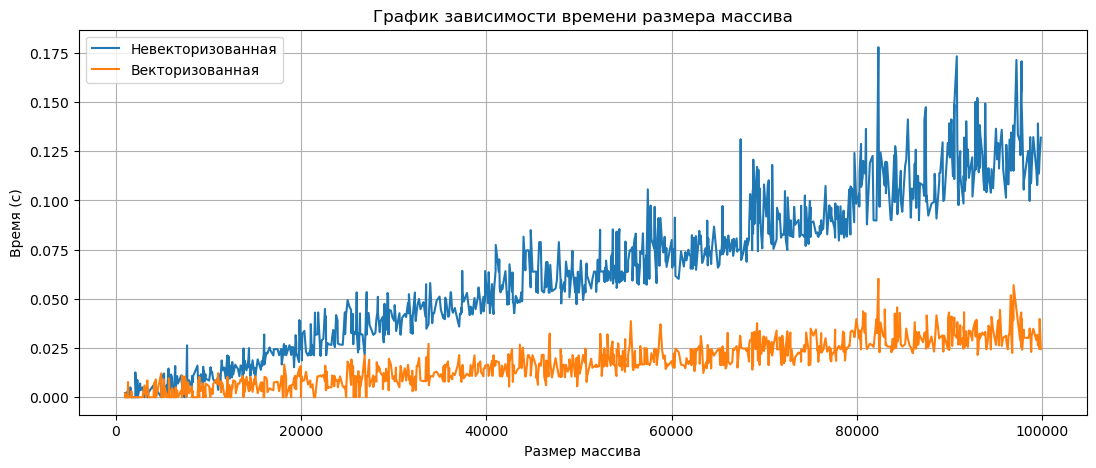

In [17]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time as time

def show_graph(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(u"График зависимости времени размера массива")
    ax2.set_xlabel(u"Размер массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    
    f.show()
    pass

def max_after_zero(x):
    max=-100
    for i in range(1,len(x)):
        if x[i-1]==0 and x[i]>max:
            max=x[i]
    return max
    
    pass
    
def max_after_zero_np(x):
    return np.max(x[1:][np.nonzero(x[:-1] == 0)])
    pass


n=10
a = [random.randint(-10, 10) for _ in range(n)]
ar=np.zeros(n)
for i in range(n):
    ar[i]=a[i]

    
    
time_vectorized=np.zeros(1000)
time_non_vectorized=np.zeros(1000)
data_size=np.zeros(1000)
res=np.zeros(1000)

for k in range(1000):
    data_size[k]=random.randint(1000,100000);
data_size.sort()

print(1)
for k in range(1000):
    n=int(data_size[k])
    
    start_time=time.time()
    
    a = [random.randint(-10, 10) for _ in range(n)]
    res1=max_after_zero(a)
    
    time_non_vectorized[k]=(time.time()-start_time)

    start_time=time.time()
    
    ar = np.zeros(n)
    for i in range(n):
        ar[i]=a[i]
    
    res2=max_after_zero_np(ar)
    
    time_vectorized[k]=(time.time()-start_time)
    
show_graph(time_non_vectorized, time_vectorized, data_size)

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


Невекторизованная функция работает за 6.74167537689209
Векторизованная функция работает за 0.14893603324890137


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\1666347123.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


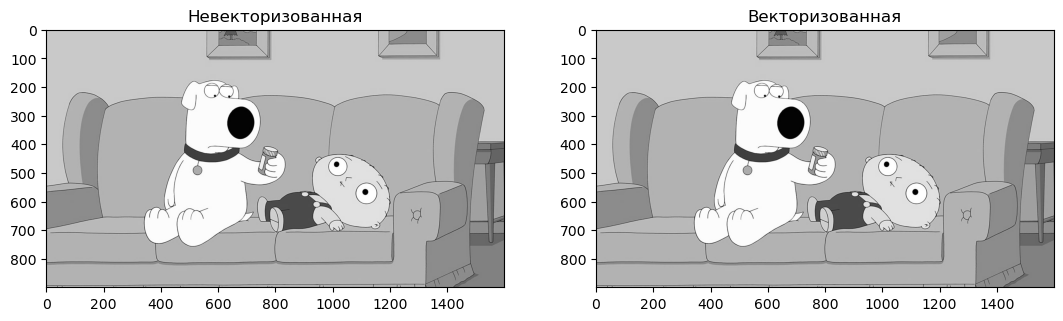

In [47]:
import time
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

def convert_image(img, coefs):
    for i in range(len(img)):
        for j in range(len(img[i])):
            img[i][j]=float(img[i][j][0]) * coefs[0] + float(img[i][j][1]) * coefs[1] + float(img[i][j][2]) * coefs[2]
    return img
    pass
def convert_image_np(img, coefs):
    return np.dot(img, coefs)
    pass

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

img = np.asarray(Image.open('961154.jpg').convert('RGB'))
arr = np.copy(img)
coefs = np.array([0.299, 0.587, 0.114])

arr = np.copy(np.asarray(arr))
start_time = time.time()

arr = Image.fromarray(convert_image(arr, coefs)).convert('RGB')

print("Невекторизованная функция работает за ", time.time()-start_time)
ax1.set_title(u"Невекторизованная")
ax1.imshow(arr)

start_time = time.time()

arr = Image.fromarray(convert_image_np(arr, coefs)).convert('RGB')

print("Векторизованная функция работает за ", time.time()-start_time)
ax2.set_title(u"Векторизованная")
ax2.imshow(arr)

f.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

1


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\3908956525.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


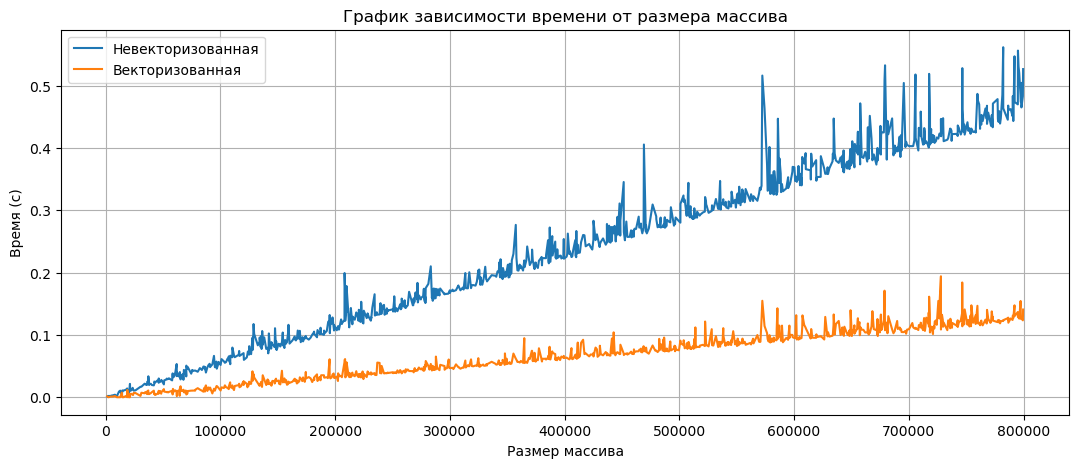

In [65]:
import time
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def show_graph(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(u"График зависимости времени от размера массива")
    ax2.set_xlabel(u"Размер массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    
    f.show()
    pass

def run_length_encoding(x):
    cnt=0
    p=x[0]
    a=[]
    b=[]
    for i in range(len(x)):
        if p==x[i]:
            cnt+=1
        else:
            a.append(p)
            b.append(cnt)
            p=x[i]
            cnt=1
    a.append(p)
    b.append(cnt)
    return (a,b)
    pass

def run_length_encoding_np(x):
    dif=np.diff(x)
    #print(dif)
    h=np.array([-1])
    h=np.append(h, np.nonzero(dif))
    h+=1
    #print(h)
    a=x[h]
    h=np.append(h,len(x))
    b=np.diff(h)
    return (a,b)
    pass

#print(run_length_encoding_np(x))

time_vectorized=np.zeros(1000)
time_non_vectorized=np.zeros(1000)
data_size=np.zeros(1000)
res=np.zeros(1000)

for k in range(1000):
    data_size[k]=random.randint(1000,800000);
data_size.sort()

print(1)
for k in range(1000):
    n=int(data_size[k])
    
    start_time=time.time()
    
    x = [random.randint(0, 100) for _ in range(n)]
    res1=run_length_encoding(x)
    
    time_non_vectorized[k]=(time.time()-start_time)

    start_time=time.time()
    
    ar = np.zeros(n)
    for i in range(n):
        ar[i]=x[i]
    
    res2=run_length_encoding_np(ar)
    
    time_vectorized[k]=(time.time()-start_time)
    
show_graph(time_non_vectorized, time_vectorized, data_size)

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

1


C:\Users\denis\AppData\Local\Temp\ipykernel_19732\1631082042.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


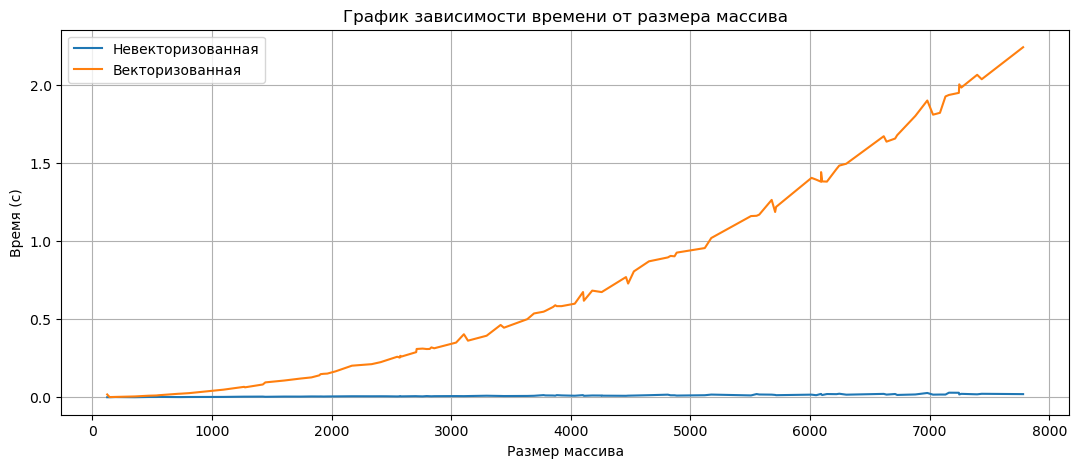

In [129]:
import time
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

def show_graph(time_non_vectorized, time_vectorized, data_size):
    
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(u"График зависимости времени от размера массива")
    ax2.set_xlabel(u"Размер массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    
    f.show()
    pass

def pairwise_distance(x, y):
    ans = []
    for i in range(len(x)):
        ans.append([])
        for j in range(len(y)):
            ans[i].append(((x[i][0] - y[j][0]) ** 2 + (x[i][1] - y[j][1]) ** 2) ** 0.5)
    return ans
    pass

def pairwise_distance_np(x, y):
    a=len(x[0])
    b=len(y[0])
    xes1=np.repeat(x[0], b)
    xes1=np.reshape(xes1, (-1, b))
    #print(xes1)
    xes2=np.repeat(y[0], b)
    xes2=np.reshape(xes2, (-1, a))
    #print(xes2)
    ans1=(xes1-xes2)**2
    #print(ans1)
    
    yes1=np.repeat(x[1], b)
    yes1=np.reshape(yes1, (-1, b))
    #print(yes1)
    yes2=np.repeat(y[1], b)
    yes2=np.reshape(yes2, (-1, a))
    #print(yes2)
    ans2=(yes1-yes2)**2
    #print(ans2)
    
    answ=(ans1+ans2)**0.5
    #print(answ)
    return answ
    pass



time_vectorized=np.zeros(100)
time_non_vectorized=np.zeros(100)
data_size=np.zeros(100)
res=np.zeros(100)



for k in range(100):
    data_size[k]=random.randint(100,8000);
data_size.sort()

print(1)
for k in range(100):
    n=int(data_size[k])
    
    start_time=time.time()
    
    x = [[random.randint(0, 5000) for _ in range(n)] for _ in range(2)]
    y = [[random.randint(0, 5000) for _ in range(n)] for _ in range(2)]
    res1=pairwise_distance(x, y)
    
    time_non_vectorized[k]=(time.time()-start_time)

    start_time=time.time()
    
    x1 = np.zeros((2,n))
    y1 = np.zeros((2,n))
    for i in range(n):
        #print(i)
        x1[0][i]=x[0][i]
        x1[1][i]=x[1][i]
        y1[0][i]=y[0][i]
        y1[1][i]=y[1][i]
    
    res2=pairwise_distance_np(x, y)
    
    time_vectorized[k]=(time.time()-start_time)
    
show_graph(time_non_vectorized, time_vectorized, data_size)

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

Домашка была достаточно сложная, нужно было много читать и разбираться в <u>NumPy</u> библиотеке. Разбирался и писал долго,
спасибо за помощь ***Газизову Данияру***, помог разобраться. **Последняя задача не получилась, но всеже мне понравилось.

~~Анектоды про евреев:~~
    — Ви таки посещаете синагогу?
    — Таки иногда, в свободное от грехов время…
    *Группа израильских альпинистов успешно обошла Эверест.*